
# YouTube Video Data Analysis: Complete Step-by-Step Guide
## A Comprehensive Data Cleaning and Data Analysis Workflow

This notebook provides a complete walkthrough of analyzing trending video data, covering:
1. Data loading and cleaning
2. Feature engineering
3. Exploratory data analysis
4. Statistical testing
5. Country-specific insights

**Dataset**: There are two dataset provided: *USvideos.csv* and *GBvideos.csv*


## Step 1: Environment Setup (complete one step in this step)
First, we'll import all necessary libraries and configure our environment. You might need the following packages:
1. numpy
2. pandas
3. matplotlib.pyplot
4. seaborn (as sns)
5. glob
6. datetime
7. scipy

Configuration packages/settings:

9. %matplotlib inline (IPython magic command)
10. sns.set() (Seaborn configuration)
11. pd.set_option() (Pandas display options)

In [1]:
# step 1: import all modules

#------- complete the step-------------
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime
import scipy
#------- complete the step-------------

# Configuration
%matplotlib inline
sns.set(style='whitegrid', palette='muted')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None

print("Environment setup complete!")

Environment setup complete!


## Step 2: Data Loading (complete two steps in this step)
We'll load all US videos CSV files and GB videos; and combine them into a single dataframe with country identifiers.

In [2]:
# step 1: read all csv files into list and assign to csv_files
csv_files=[]
# find all csv files in the current directory
for files in glob.glob("*.csv"):
    csv_files.append(files)

print(f"Found {len(csv_files)} CSV files")

# Load each CSV with country code
dataframes = []

# step 2: read csv files into dataframe and append dataframe into dataframes
for file in csv_files:
    # Extract country code from filename and assign t country_code
    country_code=file[:2]
    print(country_code)
    # read file to dataframe
    df = pd.read_csv(file)
    if df.shape[1] > 12 :
        # column concatenation
        df['category'] = df["category"].fillna('') + df.iloc[:, 12].fillna('')
        # delete unamed column after concatenation
        df = df.drop(df.columns[12], axis=1)    
    # adding a new column to the DataFrame (df) that identifies the country
    df["country"] = country_code  
    dataframes.append(df)
    
# Verify loading
print("\nSample data from first dataframe:")
display(dataframes[0].head(2))

Found 2 CSV files
GB
US

Sample data from first dataframe:


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,category,country
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240.0,13548.0,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09,News,GB
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651.0,1309.0,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09,News,GB


## Step 3: Data Cleaning (complete one function in this step)
We'll clean and standardize data types across all dataframes.

In [3]:

"""
Step 1: define a function clean_dataframe takes a dataframe parameter. 
        the function will convert columns : ['video_id', 'title', 'channel_title', 'category_id', 'tags', 'thumbnail_link']
        into string, and handling missing Tags
"""  
def clean_dataframe(df):
    # handle string type
    for field in ['video_id', 'title', 'channel_title', 'category_id', 'tags', 'thumbnail_link']:
        if field == "tags" or field == "video_id":
            # for tags, seperate and put to list if there is any, make empty list if [none] is there
            df[field] = df[field].fillna('').astype(str).apply(lambda x: "None" if (x == '[none]' or x == '#NAME?') else x.split('|'))
        else :
            # other string field convert to string
            df[field] = df[field].fillna('').astype(str)
    for field in ['views','likes','dislikes','comment_total','date']:
        if field == "date":
            # if date, convert to string, then slice to get the first 5 char
            df[field] = df[field].astype(str).apply(lambda x: x[:5] if len(x) > 0 else None)
            # convert to float64
            df[field] = df[field].fillna(0).astype(numpy.float64)
        else:
            # convert other remaining fields to int64
            df[field] = df[field].apply(lambda x: -1 if pd.isna(x) else x).astype(numpy.int64)
    return df

# Clean all dataframes
cleaned_dataframes = [clean_dataframe(df) for df in dataframes]
# Verify cleaning
print("\nData types after cleaning:")
display(cleaned_dataframes[0].dtypes)



Data types after cleaning:


video_id           object
title              object
channel_title      object
category_id        object
tags               object
views               int64
likes               int64
dislikes            int64
comment_total       int64
thumbnail_link     object
date              float64
category           object
country            object
dtype: object

## Step 4: Missing Value Analysis (complete one function in this step)
We'll identify and handle any missing values in our dataset.

In [4]:
"""
Step 1: define a function analyze_missing_data
        the function returns a missing report that contains country code, missing count and missing percent
"""
def analyze_missing_data(df_list, country_codes):
    # make template dictionary
    report={"":[],"country":[],"missing_count":[],"missing_percent":[]}
    for df, country in zip(df_list, country_codes):
        # total rows of each dataframe
        total = len(df) 
        for col in df.columns:
            if df[col].dtype == object:  
                # If column contains strings, count None and NaN values
                missing = df[col].isnull().sum()
            else:
                # If column is numeric, count NaN
                missing = (df[col] == -1).sum() + df[col].isnull().sum()
            # add to dictionary
            report[""].append(col)
            report["country"].append(country)
            report["missing_count"].append(missing)
            report["missing_percent"].append(missing*100/total)        
    return report

# defines a list contains all conuntry code.
country_codes=[file[:2] for file in csv_files]

# Make dict of missing report
missing_report = analyze_missing_data(cleaned_dataframes, country_codes)
# turn dict into dataframe
missing_report = pd.DataFrame.from_dict(missing_report)

# Display results
print("Missing value summary:")
print(missing_report[missing_report['missing_count'] > 0])
display(missing_report[missing_report['missing_count'] > 0])


Missing value summary:
             country  missing_count  missing_percent
6      likes      GB             20         0.250156
7   dislikes      GB             13         0.162602
23      date      US           7998       100.000000


,,country,missing_count,missing_percent
6,likes,GB,20,0.250156
7,dislikes,GB,13,0.162602
23,date,US,7998,100.000000


## Step 5: Data Integration (complete five steps in this step)
Combine all country dataframes into one unified dataset.

In [5]:
# Idea: every scan new one put in dict, if one video have already scan, add all the number in then go to the next iteration
# Step 1: Combine all dataframes
#------- complete the step-------------
frames = [df for df in cleaned_dataframes]
full_df = pd.concat(frames)
#------- complete the step-------------

# Step 2: Create backup before deduplication
#------- complete the step-------------
backup_df = full_df.copy()
#------- complete the step-------------

# Step 3: Remove duplicate videos (keeping first occurrence) by video_id
#------- complete the step-------------
# Initialize dictionary with columns same as columns from full_df that contains empty list
combined_df = {col: [] for col in full_df.columns}
for _, row in full_df.iterrows():
    title = row['title']
    if title not in combined_df['title']:
        # If video_id is not in combined_df, add the row
        for col in full_df.columns:
            combined_df[col].append(row[col])
    else:
        # If video_id already exists, update the numeric columns
        index = combined_df['title'].index(title)
        for col in ['views', 'likes', 'dislikes', 'comment_total']:
            combined_df[col][index] += row[col]
        # Update the date column to the latest value
        combined_df['date'][index] = row['date']
# Convert combined_df back to a DataFrame
combined_df = pd.DataFrame.from_dict(combined_df)
#------- complete the step-------------

# Step 4: Set video_id as index
#------- complete the step-------------
combined_df = combined_df.set_index('video_id')
#------- complete the step-------------

# Final dataset info
print("\nCombined dataset information:")
print(f"Total videos: {len(combined_df)}")
print(f"Countries: {combined_df['country'].unique().tolist()}")



Combined dataset information:
Total videos: 3341
Countries: ['GB', 'US']


## Step 6: Feature Engineering (complete six steps in this step)
Create new features to enhance our analysis.

In [ ]:

# Engagement metrics
# Step 1: add a column named 'like_ratio', computed as likes/dislikes
#------- complete the step-------------
# Set value to NaN when encounter missing data
combined_df['like_ratio'] = combined_df.apply(
    lambda row: row['likes'] / row['dislikes']
    if row['likes'] != -1 and row['dislikes'] not in [-1, 0]
    else float('nan'),
    axis=1
)
#------- complete the step-------------

# Step 2: add a column named 'engagement_rate', computed as (likes + dislikes + comment_total)/views
#------- complete the step-------------
# Set value to NaN when encounter missing data
combined_df['engagement_rate']= combined_df.apply(
    lambda row: (row['likes'] + row['dislikes'] + row['comment_total']) / row['views']
    if row['likes'] != -1 and row['dislikes'] != -1 and row['comment_total'] != -1 and row['views'] not in [-1,0]
    else float('nan'),
    axis = 1
)
#------- complete the step-------------

# Text features
# Step 3: add a column named 'title_length', computed as length of title
#------- complete the step-------------
combined_df['title_length'] = combined_df['title'].str.len()
#------- complete the step-------------

# Step 4: add a column named 'title_word_count', computed as number of words in title
#------- complete the step-------------
combined_df['title_word_count'] = combined_df['title'].str.split().str.len()
#------- complete the step-------------

# Step 5: add a column named 'title_has_exclamation', computed as bool value (you can make it 0 or 1) of if title contains exclamation mark
#------- complete the step-------------
combined_df['title_has_exclamation'] = combined_df['title'].apply(lambda x: 1 if '!' in x else 0)
#------- complete the step-------------

# Tag analysis
# Step 6: add a column named 'tags_count', computed as number of tags 
#------- complete the step-------------
combined_df['tags_count'] = combined_df['tags'].apply(lambda x: 0 if x is None else len(x))
#------- complete the step-------------

# Display new features
print("\nNew features created:")
display(combined_df[['like_ratio', 'engagement_rate', 
                    'title_length', 'tags_count']].describe())


New features created:


,like_ratio,engagement_rate,title_length,tags_count
count,3219.000000,3322.000000,3341.000000,3341.000000
mean,54.906432,0.039178,48.988626,18.078420
std,87.534635,0.031561,19.610027,12.013633
min,0.000000,0.000000,7.000000,1.000000
25%,13.243826,0.014870,35.000000,8.000000
50%,33.431373,0.033218,47.000000,16.000000
75%,69.012107,0.054960,61.000000,27.000000
max,2794.400000,0.233674,100.000000,70.000000


## Step 7: Exploratory Data Analysis (complete two steps in this step)
Now we'll explore our dataset through visualizations and summary statistics.

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1800x1600 with 0 Axes>

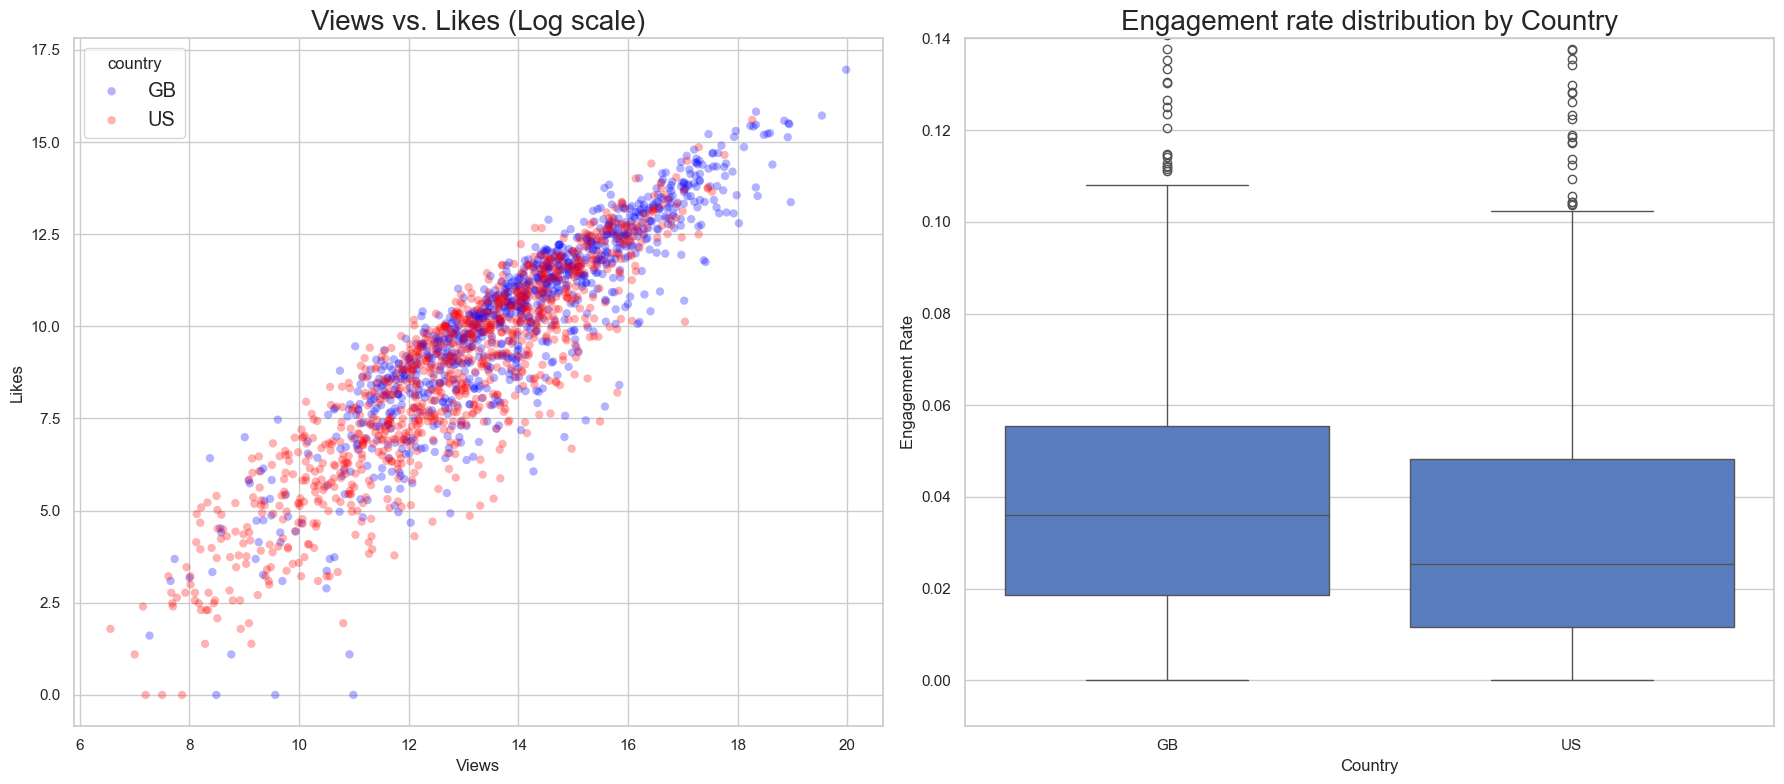

In [ ]:
# Set up the figure
plt.figure(figsize=(18, 16))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Views vs. Likes
# Step 1: make a dot plot shows views and likes. Take 1000 sample from all countries. x-axis will be views and y-axies will be views.
#         using different colors indicate different country. Add legend and plot title.

#------- complete the step-------------
GB_view = numpy.log(combined_df['views'].replace(-1,1).head(1000))
GB_like = numpy.log(combined_df['likes'].replace(-1,1).head(1000))
US_view = numpy.log(combined_df['views'].replace(-1,1).tail(1000))
US_like = numpy.log(combined_df['likes'].replace(-1,1).tail(1000))
ax1.scatter(GB_view, GB_like, c='blue', alpha=0.3, edgecolors='none', label="GB")
ax1.scatter(US_view, US_like, c='red', alpha=0.3, edgecolors='none', label="US")
ax1.legend(title = "country",loc="upper left", fontsize='large')
ax1.set_xlabel('Views')
ax1.set_ylabel('Likes')
ax1.set_title('Views vs. Likes (Log scale)', fontsize = 20)

#------- complete the step-------------

# Plot 2: Engagement Rate by Country
# Step 2: make a box plot shows different country engagement_rate

# # Drop NaN values explicitly and convert to lists
gb = combined_df['engagement_rate'].head(1000).dropna()
us = combined_df['engagement_rate'].tail(1000).dropna()

plot_df = pd.concat([
    gb.to_frame(name='engagement_rate').assign(Country='GB'),
    us.to_frame(name='engagement_rate').assign(Country='US')
], ignore_index=True)

sns.boxplot(data=plot_df, x='Country', y='engagement_rate')
plt.ylim(-0.01, 0.14)
plt.xlabel("Country")
plt.ylabel("Engagement Rate")
plt.title('Engagement rate distribution by Country', fontsize=20)
plt.tight_layout()
plt.show()

## Step 8: Country-Specific Analysis (complete one function in this step)
We'll examine trends and patterns for individual countries.

In [8]:

# Step 1: define a function that makes bar plot of country's top 5 category's views

def analyze_country(df, country_code):
    """Generate country-specific analysis"""

    #------- complete the step-------------


    #------- complete the step-------------
    pass

# Analyze sample countries
for country in ['US', 'GB']:
    analyze_country(combined_df, country)

## Step 9: Advanced Insights (complete one step in this step)
We'll extract deeper insights through more sophisticated analysis.

In [9]:
# Step 1: can you think of a analysis and visualize it?


## Step 10: Saving Results
Finally, we'll save our cleaned data and visualizations.

In [10]:
# Step 1: Save cleaned data into csv file
#------- complete the step-------------


#------- complete the step-------------

print("Saved cleaned data to 'cleaned_youtube_trending_data.csv'")

# Step 2: Save top 5 globa category bar plot visualizations
#------- complete the step-------------


#------- complete the step-------------

print("Saved visualization to 'top_categories.png'")


Saved cleaned data to 'cleaned_youtube_trending_data.csv'
Saved visualization to 'top_categories.png'
